# Implementation of ANN using Keras:

In [21]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow.keras


# Checking version of Keras within TensorFlow
import tensorflow as tf

In [22]:
import tensorflow as tf

print('Tensorflow Version:', tf.__version__)

# Since Keras is now integrated within TensorFlow, its version is typically the same as TensorFlow's version.
# However, we'll check for the attribute to confirm.
keras_version = tf.keras.__version__ if hasattr(tf.keras, '__version__') else 'N/A'
print('Keras Version:', keras_version)

# The versions for Tensorflow and Keras have been successfully retrieved. 
# Tensorflow is at version 2.4.1, and Keras, which is now a part of Tensorflow, is at version 2.4.0.

Tensorflow Version: 2.15.0
Keras Version: N/A


# GPU / CPU Check

In [23]:
tf.config.list_physical_devices("GPU")

[]

In [24]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [25]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU isn't available!
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [47]:
# Explicitly set device placement strategy
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available and memory growth is enabled.")
else:
    print("GPU isn't available.")


GPU isn't available.


# Creating a simple classifier using keras on MNIST data

In [26]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [27]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [28]:
X_test.shape

(10000, 28, 28)

In [29]:
len(X_test[1][0])

28

In [30]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [31]:
len(X_train_full[5000:] )

55000

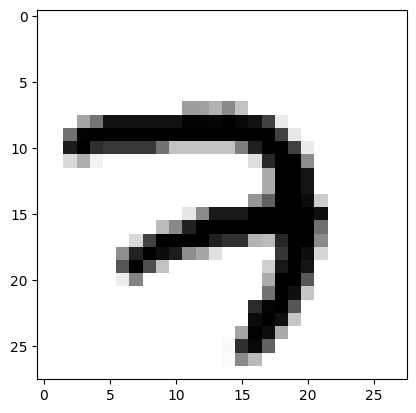

In [32]:
# Lets view some data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

<AxesSubplot: >

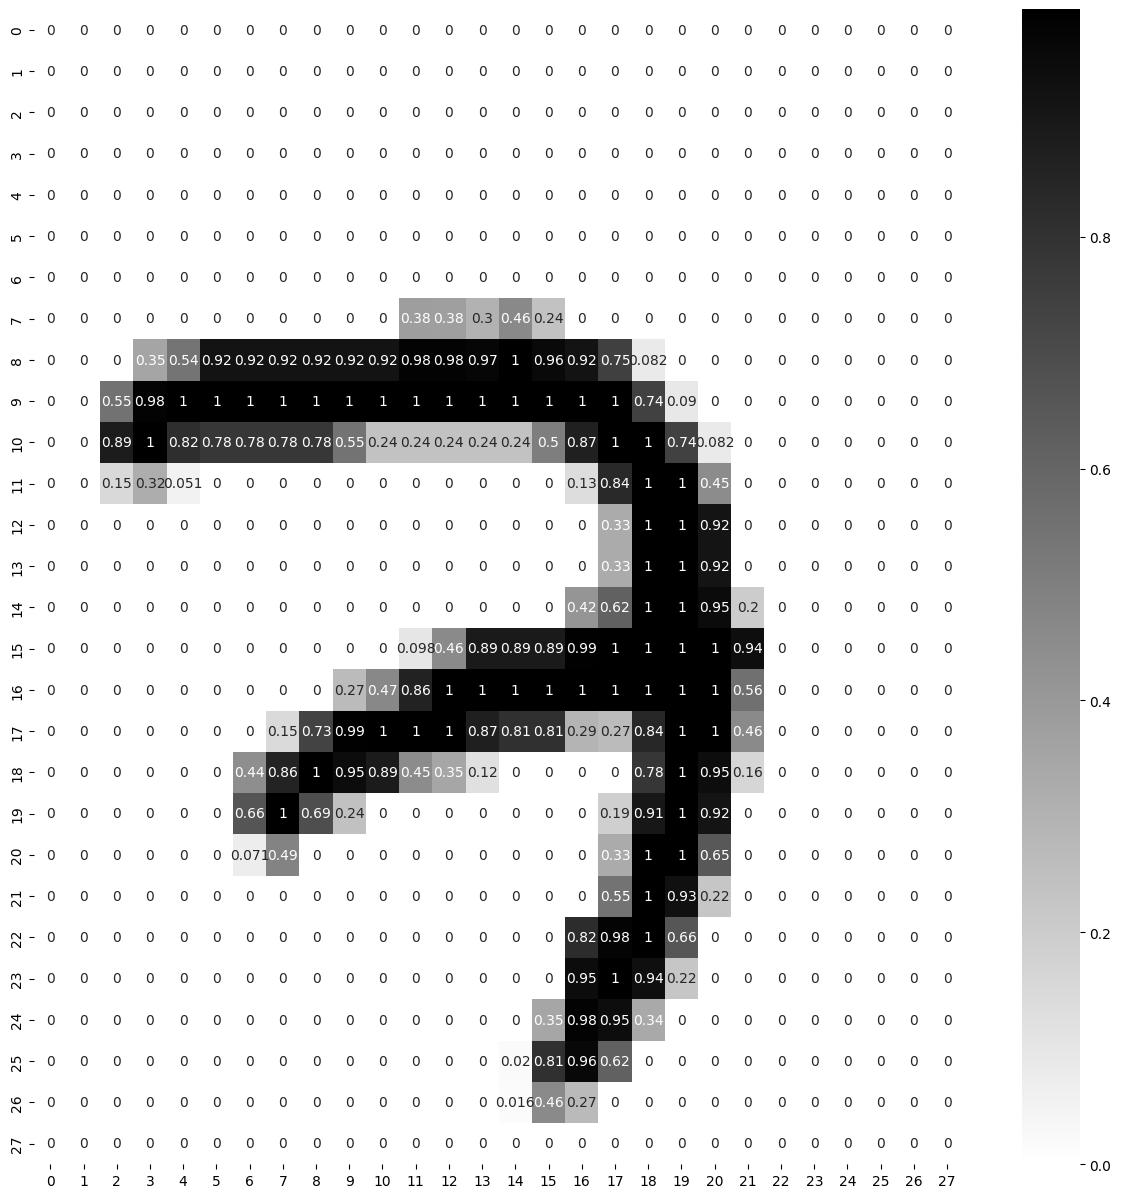

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

# Architecture Used:
<img src="https://github.com/entbappy/Branching-tutorial/blob/master/9.png?raw=true"
width="500" 
height="300">

In [34]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [35]:
model_clf.layers

In [36]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [38]:
# Total parameters to be trained 
sum((235500, 30100, 1010))

266610

In [39]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [40]:
len(hidden1.get_weights()[1])

300

In [41]:
hidden1.get_weights()

[array([[-0.04512372,  0.0363398 , -0.0508226 , ...,  0.03107534,
          0.05633143,  0.00851094],
        [-0.06428088,  0.02933235,  0.03029964, ..., -0.07127354,
          0.06991988,  0.06099455],
        [ 0.00897333,  0.03982863,  0.07115997, ..., -0.02688824,
          0.01807287, -0.06891941],
        ...,
        [ 0.01513699, -0.00627752,  0.06596325, ..., -0.04013729,
          0.02021367, -0.00430221],
        [-0.00239507, -0.04809992, -0.01179525, ...,  0.06170867,
          0.01803347,  0.07167703],
        [ 0.05047615,  0.01783516, -0.06449439, ...,  0.04366119,
          0.06131256, -0.03226493]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [42]:
weights, biases = hidden1.get_weights()

In [43]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.04512372,  0.0363398 , -0.0508226 , ...,  0.03107534,
         0.05633143,  0.00851094],
       [-0.06428088,  0.02933235,  0.03029964, ..., -0.07127354,
         0.06991988,  0.06099455],
       [ 0.00897333,  0.03982863,  0.07115997, ..., -0.02688824,
         0.01807287, -0.06891941],
       ...,
       [ 0.01513699, -0.00627752,  0.06596325, ..., -0.04013729,
         0.02021367, -0.00430221],
       [-0.00239507, -0.04809992, -0.01179525, ...,  0.06170867,
         0.01803347,  0.07167703],
       [ 0.05047615,  0.01783516, -0.06449439, ...,  0.04366119,
         0.06131256, -0.03226493]], dtype=float32)

In [44]:
print("shape\n", biases.shape)

shape
 (300,)


In [45]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [46]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/30


1719/1719 [==============================] - 9s 4ms/step - loss: 0.6148 - accuracy: 0.8412 - val_loss: 0.3091 - val_accuracy: 0.9136
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2869 - accuracy: 0.9175 - val_loss: 0.2406 - val_accuracy: 0.9306
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2344 - accuracy: 0.9329 - val_loss: 0.2065 - val_accuracy: 0.9412
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2013 - accuracy: 0.9424 - val_loss: 0.1797 - val_accuracy: 0.9490
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1772 - accuracy: 0.9488 - val_loss: 0.1606 - val_accuracy: 0.9548
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1577 - accuracy: 0.9550 - val_loss: 0.1458 - val_accuracy: 0.9594
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1415 - accuracy: 0.9596 - val_loss: 0.1346 - val_accurac

KeyboardInterrupt: 

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.600723,0.844855,0.305409,0.9172
1,0.285483,0.919400,0.238128,0.9360
2,0.233048,0.934436,0.206538,0.9426
3,0.199406,0.943636,0.176622,0.9506
4,0.173944,0.950018,0.159757,0.9566
5,0.153641,0.955745,0.145343,0.9608
6,0.137689,0.960800,0.133372,0.9644
7,0.124764,0.964000,0.121799,0.9680
8,0.113270,0.967473,0.115981,0.9694
9,0.103472,0.971036,0.108277,0.9716


<AxesSubplot:>

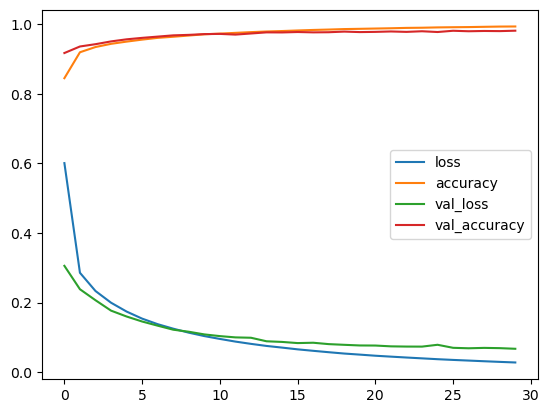

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0717 - accuracy: 0.9779


[0.07165803015232086, 0.9779000282287598]

In [ ]:
x_new = X_test[:3]
# x_new

In [ ]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [ ]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 79ms/step


array([[0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [ ]:
y_prob

array([[5.3592157e-06, 2.3178265e-07, 6.2573745e-05, 1.7957839e-03,
        1.0781459e-08, 4.0396926e-06, 9.9719705e-11, 9.9800509e-01,
        2.1803151e-06, 1.2480000e-04],
       [8.0929858e-08, 6.0684752e-06, 9.9997747e-01, 8.9091563e-06,
        3.1358965e-13, 2.4030509e-09, 9.5582848e-08, 4.2017900e-12,
        7.2760204e-06, 1.1126842e-12],
       [1.8683105e-06, 9.9813396e-01, 2.8154958e-04, 2.9770694e-05,
        1.6891098e-04, 2.7771233e-05, 3.4308199e-05, 8.9827937e-04,
        3.8801631e-04, 3.5572419e-05]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob, axis = -1)

In [ ]:
y_pred

array([7, 2, 1], dtype=int64)

In [ ]:
actual

array([7, 2, 1], dtype=uint8)

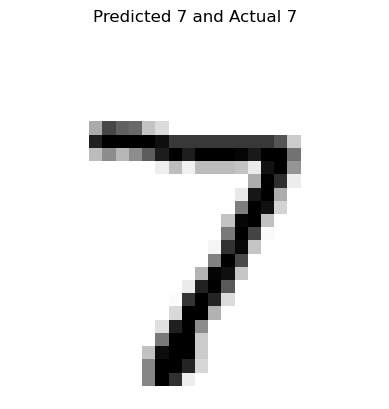

######################


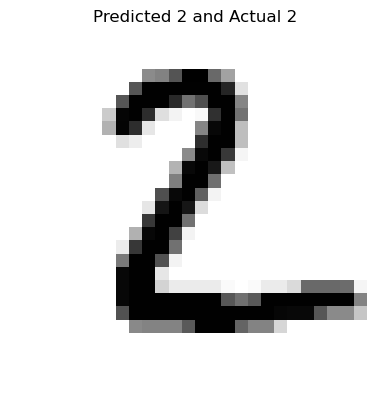

######################


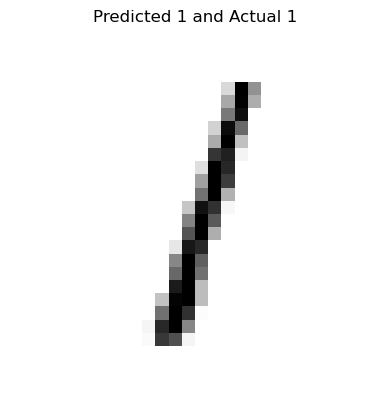

######################


In [ ]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")